<AxesSubplot:>

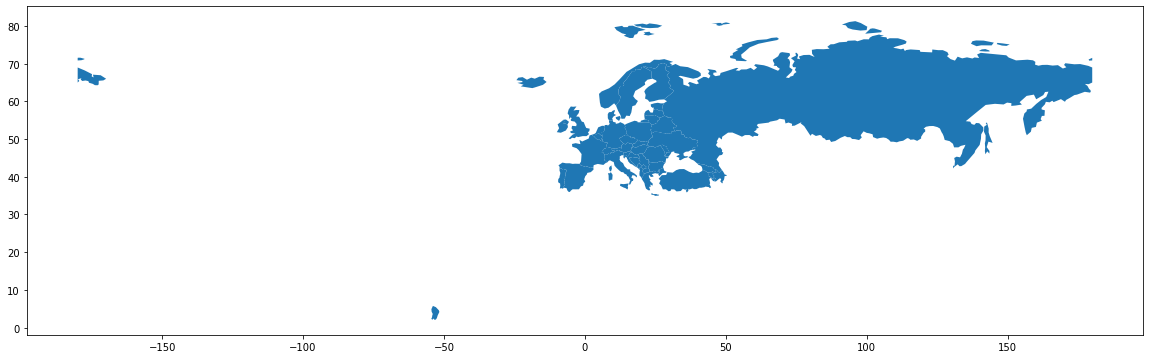

In [112]:
import pandas as pd
import geopandas

# Load the predefined world map from geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Filter for countries in Europe
europe = world[world.continent == 'Europe']
europe = europe.append(world[world.name == 'Turkey']).append(world[world.name == 'Armenia']).append(world[world.name == 'Georgia']).append(world[world.name == 'Azerbaijan'])

europe.plot()

Let's concentrate a bit more on the continent.

In [128]:
# Create a custom polygon
from shapely.geometry import Polygon
polygon = Polygon([(-35,36), (45,36), (45,75),(-35,75)])

# Clip polygon from the map of Europe
europe = geopandas.clip(europe, polygon)

europe.explore(tooltip = False, control_scale = False, width = 395, height = 400)

Here I would love to disable zooming and scrolling, and also enlarge the map. Unfortunately simply scaling up the geodataframe does not do the trick, as it messes up the interactive map displayed by explore().

But that's just the smaller issue. My original plan was to change the coloring of the map by clicking or hovering over a country. E.g. when I click on France, I should be able to highlight its neighbours. Reading through the documentation of explore() I did not find anything like that. :(

Anyway, let's plot a few static maps to show what I want to see:

In [156]:
# TODO: read it from a file
raw_data = [['Iceland', 'Poland', 40000], ['Iceland', 'Norwegian', 3000], ['Iceland', 'Ireland', 1000],
           ['Portugal', 'Germany', 10000], ['Portugal', 'United Kingdom', 60000], ['Portugal', 'Spain', 20000],
           ['Poland', 'Ukraine', 200000], ['Poland', 'Russia', 40000], ['Poland', 'Slovakia', 10000],
           ['Germany', 'Turkey', 1000000], ['Germany', 'Poland', 500000], ['Germany', 'Russia', 100000],
           ['United Kingdom', 'Poland', 300000], ['United Kingdom', 'Romania', 100000], ['United Kingdom', 'Turkey', 80000]]
nationalities = pd.DataFrame(raw_data, columns=['name','demographic_data_nationality','demographic_data_population'])
print(nationalities)

              name demographic_data_nationality  demographic_data_population
0          Iceland                       Poland                        40000
1          Iceland                    Norwegian                         3000
2          Iceland                      Ireland                         1000
3         Portugal                      Germany                        10000
4         Portugal               United Kingdom                        60000
5         Portugal                        Spain                        20000
6           Poland                      Ukraine                       200000
7           Poland                       Russia                        40000
8           Poland                     Slovakia                        10000
9          Germany                       Turkey                      1000000
10         Germany                       Poland                       500000
11         Germany                       Russia                       100000

This data shows the population of Europeans living in another European country. Now I want to display for each country the distribution of their citizens living outside their home country.

In [157]:
polish_diaspora = nationalities.where(nationalities["demographic_data_nationality"]=="Poland").dropna()
polish_diaspora = polish_diaspora.rename(columns={"demographic_data_population": "polish_pop"})
print(polish_diaspora)

              name demographic_data_nationality  polish_pop
0          Iceland                       Poland     40000.0
10         Germany                       Poland    500000.0
12  United Kingdom                       Poland    300000.0


In [171]:
merged = pd.merge(europe,polish_diaspora,on='name',how='left')
merged.explore(column = 'polish_pop', control_scale = False, width = 395, height = 400)